# Python Example: Stock Price Transformation

In this notebook, we will analyze stock prices by computing the logarithmic return between consecutive prices. This transformation captures the percentage change in stock price between two consecutive time points. We will retrieve historical stock data, compute log returns, and generate histograms of both stock prices and log returns.

### Step 1: Import Required Libraries
We will import necessary packages such as `pandas` for data handling, `numpy` for numerical operations, `matplotlib` for plotting, and `yfinance` for downloading stock price data.

In [2]:
# Import required libraries
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Step 2: Download Historical Stock Data
We will use the `yfinance` library to download the adjusted closing prices for Apple stock (AAPL) over a specified period.

In [3]:
# Download historical stock data (e.g., for Apple stock 'AAPL')
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
# Extract adjusted closing prices
prices = stock_data['Adj Close']

[*********************100%***********************]  1 of 1 completed


### Step 3: Plot Temporal Evolution and Histogram of Stock Prices
We will generate a temporal evolution plot and a histogram of the raw stock prices using the adjusted closing prices.

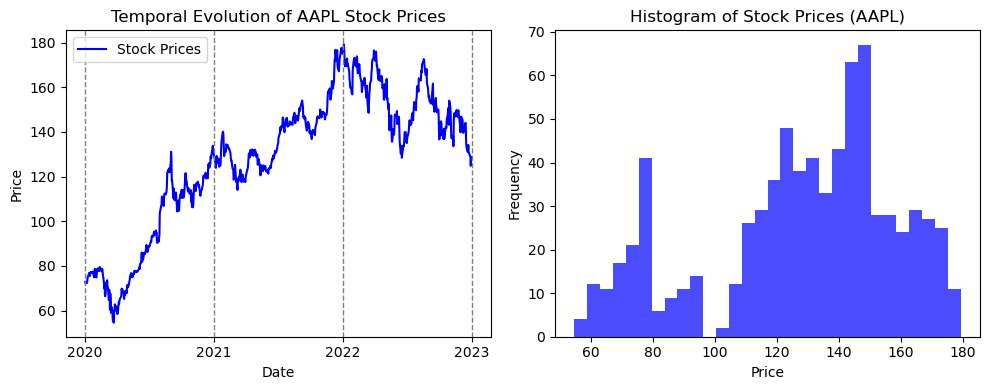

In [4]:
plt.figure(figsize=(10, 4))

# Subplot 1: Temporal evolution of AAPL stock prices
plt.subplot(1, 2, 1)
plt.plot(prices, label='Stock Prices', color='blue')
plt.title('Temporal Evolution of AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Customize the x-axis to show only the first day of each year
plt.xticks(
    pd.date_range(start='2020-01-01', end='2023-01-01', freq='YS'),
    [f"{date.year}" for date in pd.date_range(start='2020-01-01', end='2023-01-01', freq='YS')]
)

# Remove grid lines
plt.grid(False)

# Add vertical lines at the start of each year
for year in pd.date_range(start='2020-01-01', end='2023-01-01', freq='YS'):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1)

plt.legend()

# Subplot 2: Histogram of AAPL stock prices
plt.subplot(1, 2, 2)
plt.hist(prices, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Stock Prices (AAPL)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### Step 4: Compute Log Returns and Plot Temporal Evolution and Histogram of Log Returns
We will apply the log ratio transformation to compute stock returns, which reflects the percentage change between consecutive stock prices.

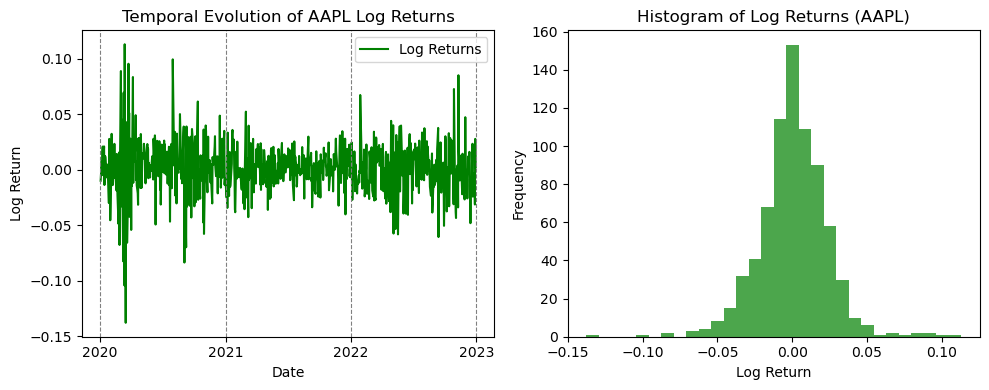

In [7]:
# Assume 'prices' is already available as a pandas Series with datetime index

# Compute log returns (log ratio transformation)
log_returns = np.log(prices / prices.shift(1)).dropna()

plt.figure(figsize=(10, 4))

# Subplot 1: Temporal evolution of log returns
plt.subplot(1, 2, 1)
plt.plot(log_returns, label='Log Returns', color='green')
plt.title('Temporal Evolution of AAPL Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')

# Set major ticks to show only the first day of each year
plt.xticks(pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']),
           ['2020', '2021', '2022', '2023'])

# Add vertical lines indicating the start of each year
for year in ['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']:
    plt.axvline(pd.to_datetime(year), color='gray', linestyle='--', linewidth=0.8)

# Remove grid lines inside the plot frame
plt.grid(False)
plt.legend()

# Subplot 2: Plot histogram of log returns
plt.subplot(1, 2, 2)
plt.hist(log_returns, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Log Returns (AAPL)')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()